## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [ ]:
# Your code here - remember to use markdown cells for comments as well!

Import required modules for data understanding an graphing

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!ls data

Aviation_Data.csv


In [3]:
aviation_df = pd.read_csv('data/Aviation_Data.csv',
                         parse_dates = ['Event.Date'])

C:\Users\rchag\AppData\Local\Temp\ipykernel_31252\4060357604.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  aviation_df = pd.read_csv('data/Aviation_Data.csv',


Taking a first look at the data, wanted to see all the columns

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
aviation_df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,091,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,091,NaN,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90347,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N9026P,PIPER,PA-24-260,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [6]:
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      90348 non-null  object        
 2   Accident.Number         88889 non-null  object        
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Location                88837 non-null  object        
 5   Country                 88663 non-null  object        
 6   Latitude                34382 non-null  object        
 7   Longitude               34373 non-null  object        
 8   Airport.Code            50249 non-null  object        
 9   Airport.Name            52790 non-null  object        
 10  Injury.Severity         87889 non-null  object        
 11  Aircraft.damage         85695 non-null  object        
 12  Aircraft.Category       32287 non-null  object

In [7]:
aviation_df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [8]:
aviation_df['Amateur.Built'].value_counts()

No     80312
Yes     8475
Name: Amateur.Built, dtype: int64

In [9]:
aviation_df['make_and_model'] = aviation_df['Make'].str.title() + ' ' + aviation_df['Model'].str.title() 

Added a make_and_model column to better categorize the planes

In [10]:
highest_accidents = aviation_df['make_and_model'].value_counts()[0:10]
highest_accidents

Cessna 152         2366
Cessna 172         1753
Cessna 172N        1163
Piper Pa-28-140     932
Cessna 150          829
Cessna 172M         798
Cessna 172P         689
Cessna 182          659
Cessna 180          621
Cessna 150M         585
Name: make_and_model, dtype: int64

In [11]:
lowest_accidents = aviation_df['make_and_model'].value_counts()
lowest_accidents

Cessna 152                                            2366
Cessna 172                                            1753
Cessna 172N                                           1163
Piper Pa-28-140                                        932
Cessna 150                                             829
Cessna 172M                                            798
Cessna 172P                                            689
Cessna 182                                             659
Cessna 180                                             621
Cessna 150M                                            585
Piper Pa-18                                            578
Piper Pa-28-180                                        572
Piper Pa-18-150                                        571
Piper Pa-28-161                                        565
Piper Pa-28-181                                        529
Bell 206B                                              516
Boeing 737                                             4

It seems like the lowest_accidents may have a small sample size, it maybe provide better results to  filter by flights with more than one accident

In [12]:
aviation_df['Weather.Condition'].value_counts()

VMC    77303
IMC     5976
UNK      856
Unk      262
Name: Weather.Condition, dtype: int64

In [24]:
aviation_df['Air.carrier'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      90348 non-null  object        
 2   Accident.Number         88889 non-null  object        
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Location                88837 non-null  object        
 5   Country                 88663 non-null  object        
 6   Latitude                34382 non-null  object        
 7   Longitude               34373 non-null  object        
 8   Airport.Code            50249 non-null  object        
 9   Airport.Name            52790 non-null  object        
 10  Injury.Severity         87889 non-null  object        
 11  Aircraft.damage         85695 non-null  object        
 12  Aircraft.Category       32287 non-null  object

In [21]:
private_df = aviation_df.dropna(subset = 'Air.carrier')
private_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,make_and_model
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,Non-Fatal,Substantial,Airplane,CF-TLU,Mcdonnell Douglas,DC9,No,2.0,Turbo Fan,Part 129: Foreign,SCHD,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017,Mcdonnell Douglas Dc9
22,20020917X01657,Accident,ATL82DA027,1982-01-02,"CHAMBLEE, GA",United States,NaN,NaN,PDK,NaN,Non-Fatal,Substantial,Helicopter,N5745Y,Bell,206L-1,No,1.0,Turbo Shaft,Part 135: Air Taxi & Commuter,NSCH,Unknown,"Rocky Mountain Helicopters, In",0.0,0.0,0.0,1.0,VMC,Approach,Probable Cause,02-01-1983,Bell 206L-1
33,20020917X02254,Accident,LAX82FA038,1982-01-04,"NEAR LAS VEGAS, NV",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,Airplane,N1956H,Piper,PA-34-200T,No,2.0,Reciprocating,Part 135: Air Taxi & Commuter,NSCH,Unknown,Lang Air Service,2.0,0.0,0.0,0.0,VMC,Cruise,Probable Cause,04-01-1983,Piper Pa-34-200T
39,20020917X01906,Accident,DCA82AA009,1982-01-05,"ITHACA, NY",United States,NaN,NaN,NaN,TOMPKINS COUNTY,Fatal(2),Destroyed,Airplane,N546BA,Piper,PA-31,No,2.0,Reciprocating,Part 135: Air Taxi & Commuter,SCHD,Unknown,Empire Airlines,2.0,0.0,0.0,0.0,VMC,Approach,Probable Cause,05-01-1983,Piper Pa-31
43,20020917X02156,Accident,LAX82DA037,1982-01-05,"SPRINGERVILLE, AZ",United States,NaN,NaN,Q35,SPRINGERVILLE,Non-Fatal,Substantial,Airplane,N738XP,Cessna,TR182,No,1.0,Reciprocating,Part 135: Air Taxi & Commuter,NSCH,Unknown,Joel Frederick's Monarch Air,0.0,0.0,0.0,1.0,VMC,Taxi,Probable Cause,05-01-1983,Cessna Tr182


Text(0.5, 1.0, 'Plane count in the private space')

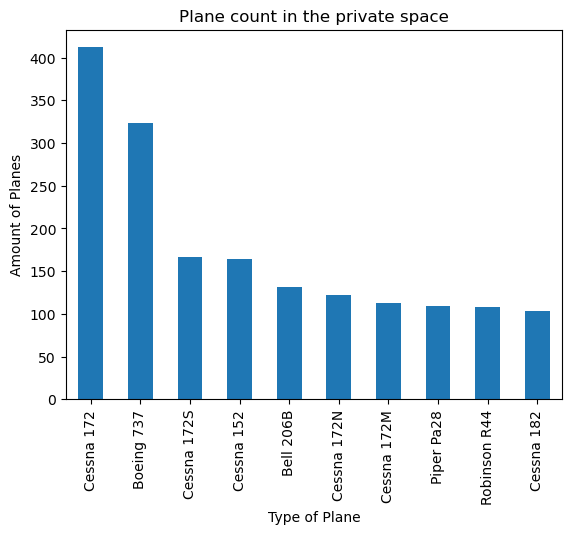

In [31]:
ax = private_df['make_and_model'].value_counts()[0:10].plot(kind = 'bar')
ax.set_xlabel('Type of Plane')
ax.set_ylabel('Amount of Planes')
ax.set_title('Plane count in the private space')

Checking on the 'Weather.Condition' Category to see if there was any relationship between accidents and the weather

In [14]:
aviation_df_test = aviation_df.copy()

In [15]:
aviation_df_test['Amateur.Built'] = aviation_df_test['Amateur.Built'].apply(lambda x: None if x == 'Yes' else x)

In [16]:
aviation_df_test.dropna(subset = 'Amateur.Built', inplace = True)

In [17]:
len(aviation_df_test['make_and_model'].value_counts().index)

10750

In [18]:
aviation_df_test['make_and_model'].value_counts().sum()

80240

In [19]:
len(aviation_df['make_and_model'].value_counts().index)

18214

In [20]:
aviation_df['make_and_model'].value_counts().sum()

88777

Seems like taking out all the 'Amateur.built' planes removes planes that appear only a few times in the data

With a cleaner data set lets see if we can now find the lowest risk airplanes for the company
to find this lets compare the cost and potential profits of the top 10 most accident prone planes and bottom 10 most accident prone by make and model